In [21]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 18})

P_H = 0.25  # probability of heads
THETA = 1e-9

S = list(range(101))
S_ = S[1:-1]  # remove terminal states
A = {s: list(range(0, min(s, 100 - s) + 1)) for s in S_}

# compute transition probabilities
p = {}
for s in S_:
    for a in A[s]:
        p_sa = {}
        p_sa[s + a] = P_H  # heads
        p_sa[s - a] = 1 - P_H  # tails
        p[(s, a)] = p_sa


# Initialize value function (fixed values for terminal states)
V = {s: 0 if s != 100 else 1 for s in S}

while True:
    delta = 0
    for s in S_:
        v = V[s]
        V[s] = max(
            [
                sum([prob * V[s_prime] for s_prime, prob in p[s, a].items()])
                for a in A[s]
            ]
        )
        delta = max(delta, abs(v - V[s]))
    if delta < THETA:
        break

# Compute policy given fit value function
# In the case of a tie in the argmax call (defined by equality up to 9 decimal
# places), choose the smallest stake.
pi = {
    s: np.argmax(
        [
            np.round(sum([prob * V[s_prime] for s_prime, prob in p[s, a].items()]), 9)
            for a in A[s]
        ]
    )
    for s in S_
}

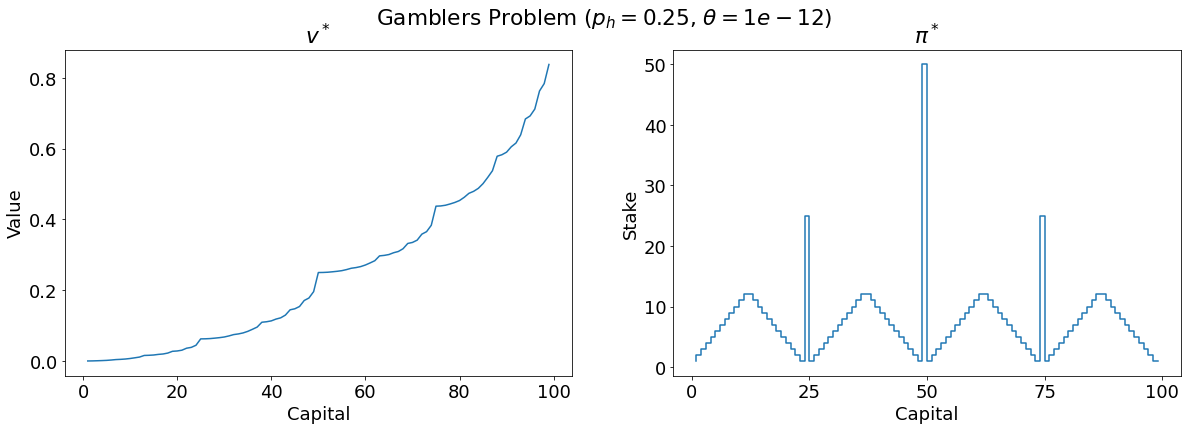

In [20]:
def plot_results(save=False):
    fig, axes = plt.subplots(figsize=(20, 6), ncols=2)

    axes[0].plot(S_, [V[s] for s in S_])
    axes[0].set_xlabel("Capital")
    axes[0].set_ylabel("Value")
    axes[0].set_title("$v^*$")

    axes[1].plot(S_, [pi[s] for s in S_], drawstyle="steps")
    axes[1].set_xlabel("Capital")
    axes[1].set_xticks(range(0, 101, 25))
    axes[1].set_ylabel("Stake")
    axes[1].set_title("$\pi^*$")

    plt.suptitle(f"Gamblers Problem ($p_h={P_H}$, $\\theta={THETA}$)")
    if save:
        plt.savefig(f"gamblers_problem_p_h_{P_H}.png")
    plt.show()

plot_results()